In [41]:
import numpy as np 
import pandas as pd

In [42]:
df = pd.read_csv("amanda_dataset.csv")
df.head()

,Name,Review,Order Type,Rating,Date
0,Nitiksha Manihar,the coffee was just pathetic it was more of a ...,DINING,4.1,6 days ago
1,Avina Taneja,The place when we visited was a lovely calm vi...,DINING,3.0,5 months ago
2,Shilpa D,A good place to gang out with friends. I had b...,DINING,1.0,8 months ago
3,Moumita D,"Every time I visit Ananda Cafe, I come away ch...",DINING,2.0,8 months ago
4,Kareena G,"Good, quiet place. Healthy food options.\r\nWa...",DINING,4.1,9 months ago


In [43]:
import pandas as pd

# Load the dataset
df = pd.read_csv('amanda_dataset.csv')  # Replace 'your_dataset.csv' with the actual file name

# Check the distribution of ratings in different ranges
rating_ranges = {
    '0-1': df[(df['Rating'] >= 0) & (df['Rating'] < 1)].shape[0],
    '1-2': df[(df['Rating'] >= 1) & (df['Rating'] < 2)].shape[0],
    '2-3': df[(df['Rating'] >= 2) & (df['Rating'] < 3)].shape[0],
    '3-4': df[(df['Rating'] >= 3) & (df['Rating'] < 4)].shape[0],
    '4-5': df[(df['Rating'] >= 4) & (df['Rating'] <= 5)].shape[0],
}

# Print the results
for rating_range, count in rating_ranges.items():
    print(f"Number of ratings in range {rating_range}: {count}")


Number of ratings in range 0-1: 0
Number of ratings in range 1-2: 2
Number of ratings in range 2-3: 2
Number of ratings in range 3-4: 6
Number of ratings in range 4-5: 29


In [44]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Average Rating: 3.97


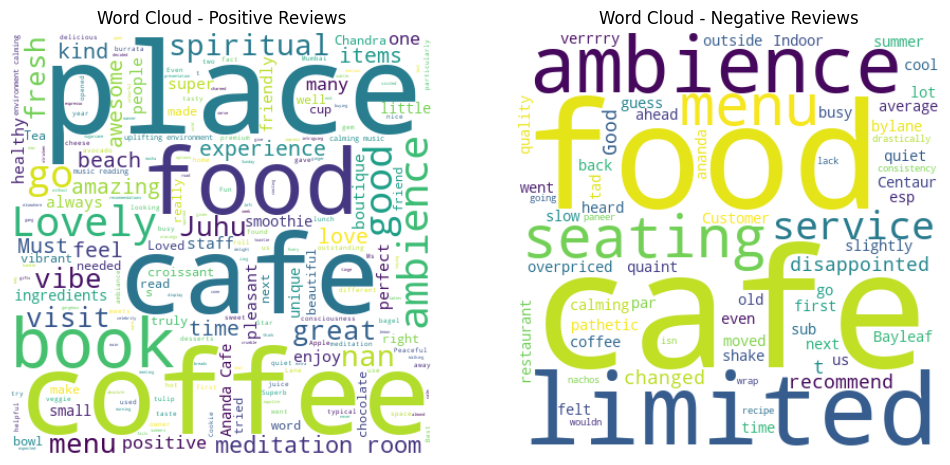

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('amanda_dataset.csv') 

# Convert 'Review' column to string to handle potential float values
df['Review'] = df['Review'].astype(str)

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Review'].apply(lambda x: 'positive' if sid.polarity_scores(x)['compound'] >= 0 else 'negative')

# Average Rating
average_rating = df['Rating'].mean()
print(f"Average Rating: {average_rating:.2f}")

# Word Cloud for Positive and Negative Reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 'positive']['Review'])
negative_reviews = ' '.join(df[df['Sentiment'] == 'negative']['Review'])

# Plotting Word Clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

wordcloud_positive = WordCloud(width=400, height=400, background_color='white').generate(positive_reviews)
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('Word Cloud - Positive Reviews')
axes[0].axis('off')

wordcloud_negative = WordCloud(width=400, height=400, background_color='white').generate(negative_reviews)
axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].set_title('Word Cloud - Negative Reviews')
axes[1].axis('off')

plt.show()


In [46]:
df.head()

,Name,Review,Order Type,Rating,Date,Sentiment
0,Nitiksha Manihar,the coffee was just pathetic it was more of a ...,DINING,4.1,6 days ago,negative
1,Avina Taneja,The place when we visited was a lovely calm vi...,DINING,3.0,5 months ago,positive
2,Shilpa D,A good place to gang out with friends. I had b...,DINING,1.0,8 months ago,positive
3,Moumita D,"Every time I visit Ananda Cafe, I come away ch...",DINING,2.0,8 months ago,positive
4,Kareena G,"Good, quiet place. Healthy food options.\r\nWa...",DINING,4.1,9 months ago,positive


Average Rating (Overall): 3.97
Average Rating for Dining: 3.97
Average Rating for Delivery: nan


ValueError: We need at least 1 word to plot a word cloud, got 0.

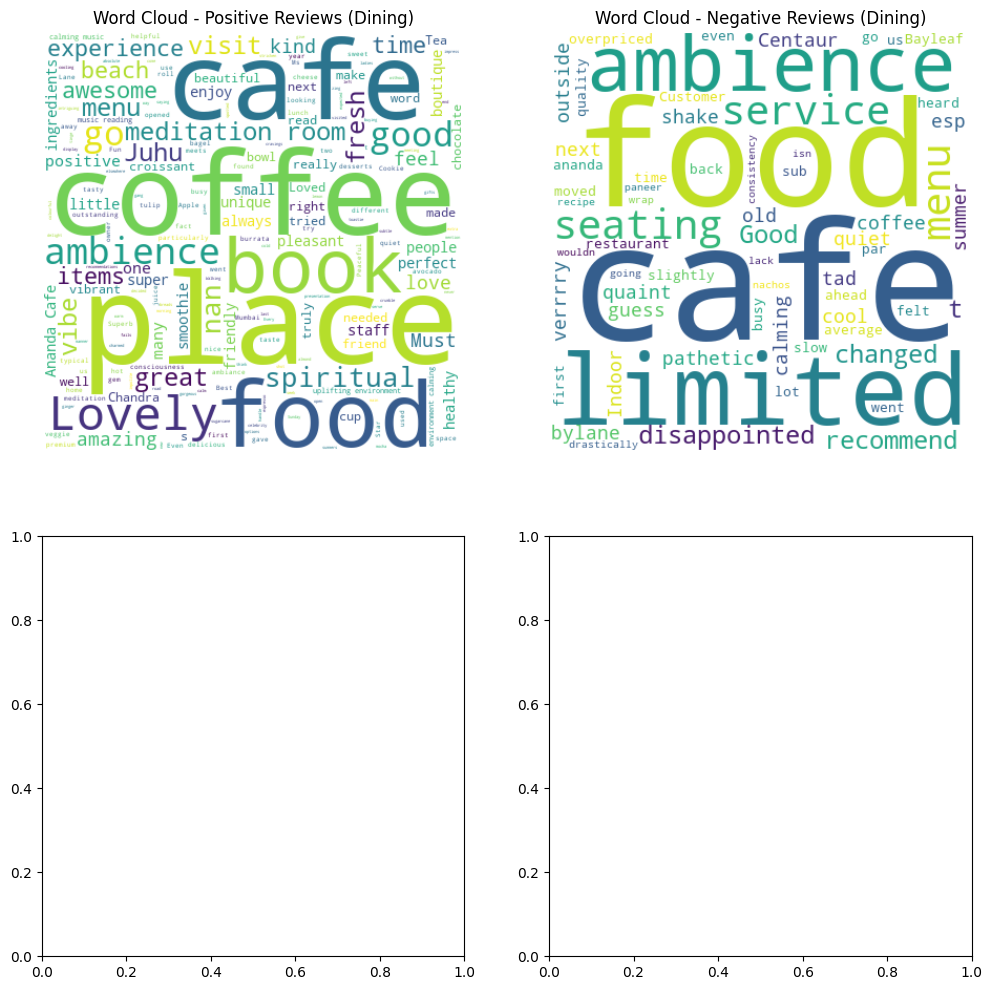

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('amanda_dataset.csv')  # Replace 'your_dataset.csv' with the actual file name

# Convert 'Review' column to string to handle potential float values
df['Review'] = df['Review'].astype(str)

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Review'].apply(lambda x: 'positive' if sid.polarity_scores(x)['compound'] >= 0 else 'negative')

# Average Rating
average_rating = df['Rating'].mean()
print(f"Average Rating (Overall): {average_rating:.2f}")

# Separate data for Dining and Delivery
df_dining = df[df['Order Type'] == 'DINING']
df_delivery = df[df['Order Type'] == 'DELIVERY']

# Average Rating for Dining
average_rating_dining = df_dining['Rating'].mean()
print(f"Average Rating for Dining: {average_rating_dining:.2f}")

# Average Rating for Delivery
average_rating_delivery = df_delivery['Rating'].mean()
print(f"Average Rating for Delivery: {average_rating_delivery:.2f}")

# Word Cloud for Positive and Negative Reviews in Dining
positive_reviews_dining = ' '.join(df_dining[df_dining['Sentiment'] == 'positive']['Review'])
negative_reviews_dining = ' '.join(df_dining[df_dining['Sentiment'] == 'negative']['Review'])

# Word Cloud for Positive and Negative Reviews in Delivery
positive_reviews_delivery = ' '.join(df_delivery[df_delivery['Sentiment'] == 'positive']['Review'])
negative_reviews_delivery = ' '.join(df_delivery[df_delivery['Sentiment'] == 'negative']['Review'])

# Plotting Word Clouds
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

wordcloud_positive_dining = WordCloud(width=400, height=400, background_color='white').generate(positive_reviews_dining)
axes[0, 0].imshow(wordcloud_positive_dining, interpolation='bilinear')
axes[0, 0].set_title('Word Cloud - Positive Reviews (Dining)')
axes[0, 0].axis('off')

wordcloud_negative_dining = WordCloud(width=400, height=400, background_color='white').generate(negative_reviews_dining)
axes[0, 1].imshow(wordcloud_negative_dining, interpolation='bilinear')
axes[0, 1].set_title('Word Cloud - Negative Reviews (Dining)')
axes[0, 1].axis('off')

wordcloud_positive_delivery = WordCloud(width=400, height=400, background_color='white').generate(positive_reviews_delivery)
axes[1, 0].imshow(wordcloud_positive_delivery, interpolation='bilinear')
axes[1, 0].set_title('Word Cloud - Positive Reviews (Delivery)')
axes[1, 0].axis('off')

wordcloud_negative_delivery = WordCloud(width=400, height=400, background_color='white').generate(negative_reviews_delivery)
axes[1, 1].imshow(wordcloud_negative_delivery, interpolation='bilinear')
axes[1, 1].set_title('Word Cloud - Negative Reviews (Delivery)')
axes[1, 1].axis('off')

plt.show()


In [48]:
import pandas as pd

# Load the dataset
df = pd.read_csv('amanda_dataset.csv')  # Replace 'your_dataset.csv' with the actual file name

# Extract numeric values from 'Date' column
numeric_days = df['Date'].str.extract('(\d+)').astype(float)

# Replace non-numeric values with NaN
numeric_days = pd.to_numeric(numeric_days[0], errors='coerce')

# Convert 'Date' column to timedelta
df['DaysAgo'] = pd.to_timedelta(numeric_days, unit='D')

# Calculate the actual date
df['ActualDate'] = pd.to_datetime('today') - df['DaysAgo']

# Convert 'ActualDate' column to standard datetime format
df['ActualDate'] = pd.to_datetime(df['ActualDate'])

# Extract only the date portion
df['ActualDate'] = df['ActualDate'].dt.date



In [49]:
df.head()

,Name,Review,Order Type,Rating,Date,DaysAgo,ActualDate
0,Nitiksha Manihar,the coffee was just pathetic it was more of a ...,DINING,4.1,6 days ago,6 days,2024-02-11
1,Avina Taneja,The place when we visited was a lovely calm vi...,DINING,3.0,5 months ago,5 days,2024-02-12
2,Shilpa D,A good place to gang out with friends. I had b...,DINING,1.0,8 months ago,8 days,2024-02-09
3,Moumita D,"Every time I visit Ananda Cafe, I come away ch...",DINING,2.0,8 months ago,8 days,2024-02-09
4,Kareena G,"Good, quiet place. Healthy food options.\r\nWa...",DINING,4.1,9 months ago,9 days,2024-02-08


: 